# Distribuição de Frequêcia

## Teoria

Uma distribuição de frequência é uma forma de organizar e resumir dados, mostrando a frequência (ou seja, quantas vezes) com que cada valor ou intervalo de valores aparece em um conjunto de dados.

Imagine que você tem uma lista de estaturas dos alunos da sua turma. Em vez de olhar para todas as estaturas individualmente, uma distribuição de frequência te ajuda a ver rapidamente:

* **Quantos alunos têm cada estatura específica** (por exemplo, 3 alunos têm 156 cm, 5 alunos têm 160 cm, etc.)

* **Quantos alunos caem em determinados intervalos de estatura** (por exemplo, 5 alunos têm entre 150-154 cm, 9 alunos têm entre 154-158 cm)

Ela é fundamental para entender a estrutura e o padrão dos seus dados, identificando valores comuns, incomuns, a dispersão dos dados e possíveis tendências. Pode ser apresentada em tabelas, gráficos de barras (histogramas) ou gráficos de pizza.


<br>

#### **Conjunto de dados para exemplo**

![conjunto de dados](https://github.com/AdrianoR85/Estatistica-para-Machine-Learning/blob/d12a9c994867a57eeff1916243f57bd381ffb786/assets/distribbui%C3%A7ao_de_frequencia.png?raw=true)


#### **Teminologias**:

* **Classe:** Intervalos de variação da variável é resentados simbolicamente por **"i"**.

* **Limite de classe:** É o limite inferior (l) e superio (L) da   classe.
  - Exemplo: l = 150 e L = 158

* **Amplitude de um intervalo de classe (hi):**  é a diferença entre o limite superior e o limite inferior de uma classe em uma distribuição de frequência agrupada.
  - hi = Li - li ➡️ (154 - 150 = 4).

* **Amplitude total da distribuição (AT):** é a diferença entre o maior e o menor valor de um conjunto de dados:
  - AT = L<sub>max</sub> - L<sub>min</sub> ➡️ (173 - 150 = 23)

* **Amplitude amostral:** é diferença entre o valor máximo e o valor mínimo observados em um conjunto de dados amostrais (AA).
  - AA = X<sub>max</sub> - X<sub>min</sub> ➡️ (173 - 150 = 23)

* **Ponto médio de uma classe:**  é o valor que representa o centro de um determinado intervalo de classe em uma distribuição de frequência agrupada.
  - Xi = (Li + li) / 2 ➡️ (158 + 154) / 2 = 156cm

* **Frequência:** é o número de vezes que um determinado valor aparece em um conjunto de dados.
Existem diferentes tipos de frequência:

  - **Frequência Absoluta (fi):** É o número puro de ocorrências de um valor ou de uma classe.
    - f<sub>1</sub> = 5

  - **Frequência Relativa (fr):** É a proporção de ocorrências de um valor ou classe em relação ao total de observações. Geralmente é expressa como uma porcentagem ou um decimal.
    - fr = (fi / Total de Observações) * 100 ➡️ (5 / 40) * 100 =  12,5

  - **Frequência Acumulada (Fi):** É a soma das frequências de um valor ou classe com as frequências de todos os valores ou lasses anteriores. Ela mostra quantas observações estão abaixo ou são iguais a um determinado valor/classe.
   
  - **Frequência Relativa Acumulada (Fr):** É a soma das frequências relativas de um valor ou classe com as frequências relativas de todos os valores ou classes anteriores. Mostra a porcentagem acumulada de observações até aquele ponto.

### **Determinar o número de classes**
A formar mais utilizada para determinar o número de classe é a utilização da Fórmula de *Sturges*

```
k = 1 + 3.33 * log(n)

1 + 3.33 * log(40)
1 + 3.33 * 1.6
k = 6.28
```

#### *Onde*:

* **k** é o número de classes (o resultado deve ser arredondado para o número inteiro mais próximo).
* **n** é o número total de observações (o tamanho da sua amostra ou população de dados).
* **log** é o logaritmo na base 10.

#### **Determinar a amplitude do intervalo de classe**
```
h = AA / k

h = (173 - 150) / 6
h = 23 / 6
h = 4 -> (3,83) sempre arrendodar para cima

```

## Bibliotecas e Dados

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [6]:
data = np.array([160, 165, 167, 164, 160, 166, 160, 161, 150, 152, 173, 160, 155,
                  164, 168, 162, 161, 168, 163, 156, 155, 169, 151, 170, 164,
                  155, 152, 163, 160, 155, 157, 156, 158, 158, 161, 154, 161, 156, 172, 153])

## Ordenação

In [8]:
data = np.sort(data)
data

array([150, 151, 152, 152, 153, 154, 155, 155, 155, 155, 156, 156, 156,
       157, 158, 158, 160, 160, 160, 160, 160, 161, 161, 161, 161, 162,
       163, 163, 164, 164, 164, 165, 166, 167, 168, 168, 169, 170, 172,
       173])

In [9]:
minimo = data.min()
maximo = data.max()
print(f'Menor valor: {minimo}')
print(f'Maior valor: {maximo}')

Menor valor: 150
Maior valor: 173


In [10]:
np.unique(data,return_counts=True)

(array([150, 151, 152, 153, 154, 155, 156, 157, 158, 160, 161, 162, 163,
        164, 165, 166, 167, 168, 169, 170, 172, 173]),
 array([1, 1, 2, 1, 1, 4, 3, 1, 2, 5, 4, 1, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1]))

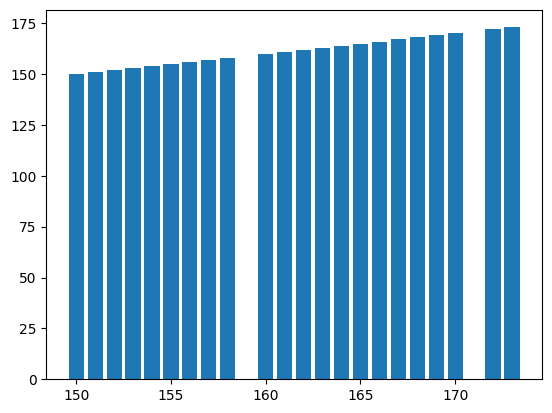

In [13]:
plt.bar(data,data)
plt.show()

## Número de classes

- k = 1 + 3.3 log n

In [20]:
n = len(data)
k = 1 + 3.3 * np.log10(n)
k

np.float64(6.286797971382276)

In [21]:
k = round(k)
k

6

## Amplitude do intervalo

* h = AA / k
* AA = Xmax - Xmin

In [15]:
AA = maximo - minimo
AA

np.int64(23)

In [22]:
h = AA / k
h

np.float64(3.8333333333333335)

In [25]:
h = math.ceil(h)
h

4

## Construção da distribuição de frequência

In [27]:
interval = np.arange(minimo, maximo + 2,h)
interval

array([150, 154, 158, 162, 166, 170, 174])

In [35]:
interval1, interval2, interval3, interval4, interval5, interval6 = 0,0,0,0,0,0
for i in data:
  if i >= interval[0] and i < interval[1]:
    interval1 += 1
  elif i >= interval[1] and i < interval[2]:
    interval2 += 1
  elif i >= interval[2] and i < interval[3]:
    interval3 += 1
  elif i >= interval[3] and i < interval[4]:
    interval4 += 1
  elif i >= interval[4] and i < interval[5]:
    interval5 +=1
  elif i >= interval[5] and i < interval[6]:
    interval6 += 1

In [40]:
interval_list = [interval1, interval2, interval3, interval4, interval5, interval6]
interval_list

[5, 9, 11, 7, 5, 3]

In [49]:
class_list = []
for i in range(len(interval_list)):
  class_list.append(f'{interval[i]} - {interval[i+1]}')

class_list

['150 - 154', '154 - 158', '158 - 162', '162 - 166', '166 - 170', '170 - 174']

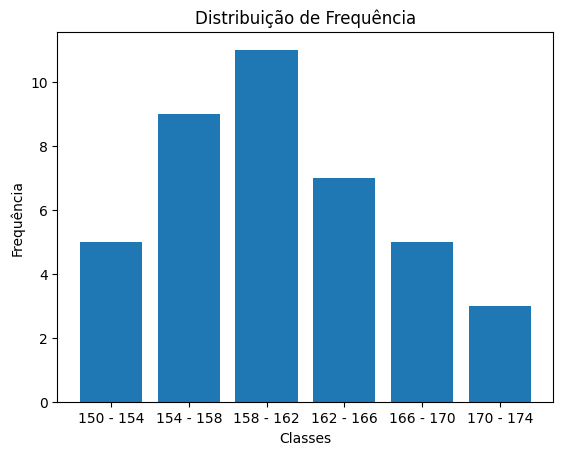

In [51]:
plt.bar(class_list, interval_list)
plt.title('Distribuição de Frequência')
plt.xlabel('Classes')
plt.ylabel('Frequência')
plt.show()

## Distribuição de frequência e histograma com numpy e matplotlib

In [52]:
data2 = np.array([160, 165, 167, 164, 160, 166, 160, 161, 150, 152, 173, 160, 155,
                  164, 168, 162, 161, 168, 163, 156, 155, 169, 151, 170, 164,
                  155, 152, 163, 160, 155, 157, 156, 158, 158, 161, 154, 161, 156, 172, 153])

In [56]:
frequency, classes = np.histogram(data2)
frequency, classes

(array([4, 2, 7, 3, 9, 3, 5, 3, 2, 2]),
 array([150. , 152.3, 154.6, 156.9, 159.2, 161.5, 163.8, 166.1, 168.4,
        170.7, 173. ]))

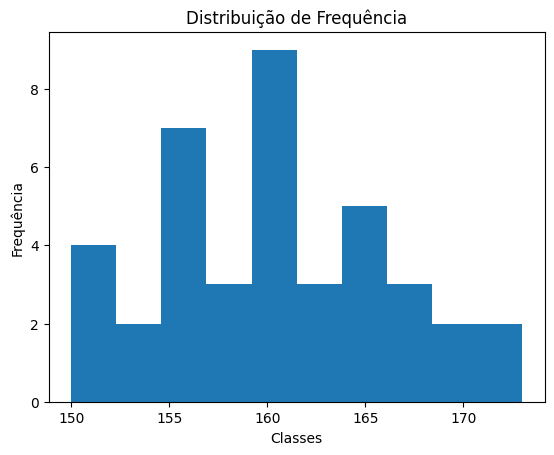

In [59]:
plt.hist(data2, bins=classes)
plt.title('Distribuição de Frequência')
plt.xlabel('Classes')
plt.ylabel('Frequência')
plt.show()
#

In [60]:
frequency, classes = np.histogram(data2, bins=5)
frequency, classes

(array([ 6, 10, 12,  8,  4]),
 array([150. , 154.6, 159.2, 163.8, 168.4, 173. ]))

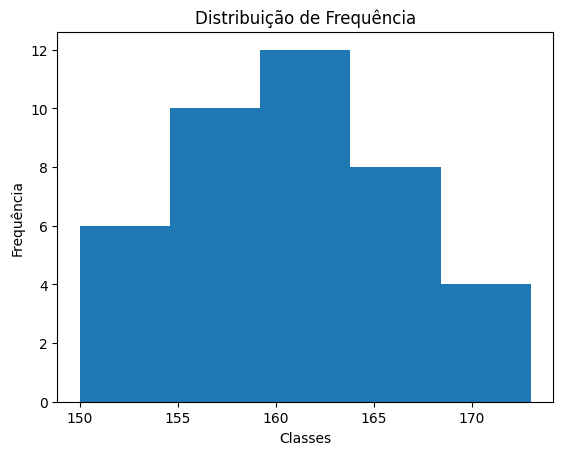

In [61]:
plt.hist(data2, bins=classes)
plt.title('Distribuição de Frequência')
plt.xlabel('Classes')
plt.ylabel('Frequência')
plt.show()

In [62]:
frequency, classes = np.histogram(data2, bins='sturges')
frequency, classes

(array([ 5,  8,  3, 12,  5,  4,  3]),
 array([150.        , 153.28571429, 156.57142857, 159.85714286,
        163.14285714, 166.42857143, 169.71428571, 173.        ]))

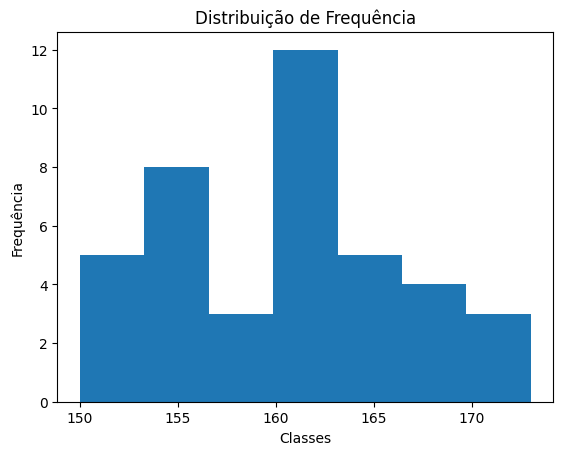

In [63]:
plt.hist(data2, bins=classes)
plt.title('Distribuição de Frequência')
plt.xlabel('Classes')
plt.ylabel('Frequência')
plt.show()

## Distribuição de frequencia e histograma com pandas e seaborn

## Regras de associação